# Notebook for Nonesuch Shale pmag thermal demagnetization analyses

This Python notebook is for analyzing and visualizng thermal demagnetization data of paleomagnetic samples collected from the Nonesuch Shale. 

A total of four components are identified and are named as the following:
- a lt component: low temperature component, oftenly corresponds to the present day local field direction in geographic coordinates
    - this might be associated with component 4 (low coercivity component about <50 mT) from rock mag unmix result
- a mt component: magnetite temperature component, oftenly fitted in a small unblocking temperature window between 500 and 580, interpreted to be the remanence carried by dertital magnetite and hold a remanence similar to the high temperature component hdt of detrital hematite 
- a hdt component: hematite detrital remanence component, oftenly fitted in a small range of unblocking temperature steps from 600 to 680 that have a similar direction to the mt component
- a hct component: hematite chemical remanence component, oftenly fitted in a wide range of unblocking temperature steps from 300 to 600 that display distinct direction than the mt and hdt components
    - this might be associated with component 2 (high coercivity component aboue >500 mT) from rock mag unmix result

In [1]:
import pandas as pd
import numpy as np
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Load Potato River Falls demag data

In [2]:
Nonesuch_demag_site = pd.read_csv('../Data/Thermal_PF18/sites.txt', sep='\t', header=1)
Nonesuch_demag_specimen = pd.read_csv('../Data/Thermal_PF18/specimens.txt', sep='\t', header=1)
Nonesuch_demag_specimen['lon'] = -90.5
Nonesuch_demag_specimen['lat'] = 46.5
Nonesuch_demag_specimen = ipmag.vgp_calc(Nonesuch_demag_specimen, tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)

display(Nonesuch_demag_site.head())
display(Nonesuch_demag_specimen.head())

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,...,analysts,criteria,software_packages,citations,method_codes,result_quality,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,PF18,Northern Wisconsin,PF18-100:PF18-101:PF18-102:PF18-103:PF18-104:P...,PF18-100a:PF18-101a:PF18-102a:PF18-103a:PF18-1...,2.0,hct,250.8,56.1,35,146,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,2.9,2.1,14.6,218.0
1,PF18,Northern Wisconsin,PF18-102:PF18-104:PF18-105:PF18-107:PF18-108:P...,PF18-102a:PF18-104a:PF18-105a:PF18-107a:PF18-1...,2.7,hdt,221.4,49.9,23,119,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:LP-DC4:DE-FM,g,3.6,2.4,-4.2,234.7
2,PF18,Northern Wisconsin,PF18-100:PF18-101:PF18-102:PF18-103:PF18-104:P...,PF18-100a:PF18-101a:PF18-102a:PF18-103a:PF18-1...,2.1,lt,351.2,75.6,41,117,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,3.9,3.5,72.9,255.7
3,PF18,Northern Wisconsin,PF18-100:PF18-101:PF18-102:PF18-104:PF18-107:P...,PF18-100a:PF18-101a:PF18-102a:PF18-104a:PF18-1...,2.7,mt,228.5,54.0,30,96,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,3.8,2.7,2.0,231.4
4,PF18,Northern Wisconsin,PF18-100:PF18-101:PF18-102:PF18-103:PF18-104:P...,PF18-100a:PF18-101a:PF18-102a:PF18-103a:PF18-1...,2.0,hct,281.3,-9.2,35,146,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,2.0,1.0,4.4,168.1


,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,weight,location,site,lon,lat,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,PF18-100a,NaN,PF18-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01349,Northern Wisconsin,PF18,-90.5,46.5,NaN,NaN,NaN,NaN,NaN
1,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,mt,300.3,61.0,3.0,4.0,-1.0,...,NaN,Northern Wisconsin,PF18,-90.5,46.5,42.051214,48.050447,195.950659,-48.050447,15.950659
2,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,lt,96.1,76.0,3.0,5.0,-1.0,...,NaN,Northern Wisconsin,PF18,-90.5,46.5,63.496586,38.061072,303.802635,-38.061072,123.802635
3,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,hct,327.2,70.3,3.0,7.0,-1.0,...,NaN,Northern Wisconsin,PF18,-90.5,46.5,54.393410,67.915279,212.480280,-67.915279,32.480280
4,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,mt,218.7,52.1,3.0,4.0,0.0,...,NaN,Northern Wisconsin,PF18,-90.5,46.5,32.711752,-3.440340,237.695069,3.440340,57.695069


## plot all components

In [3]:
Nonesuch_demag_site_lt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'lt') & (Nonesuch_demag_site['dir_tilt_correction'] == 0)]
Nonesuch_demag_site_mt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'mt') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_hct = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'hct') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_hdt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'hdt') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]

Nonesuch_demag_specimen_lt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'lt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 0)]
Nonesuch_demag_specimen_mt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'mt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_hct = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hct') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_hdt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hdt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]

### low temp remanence

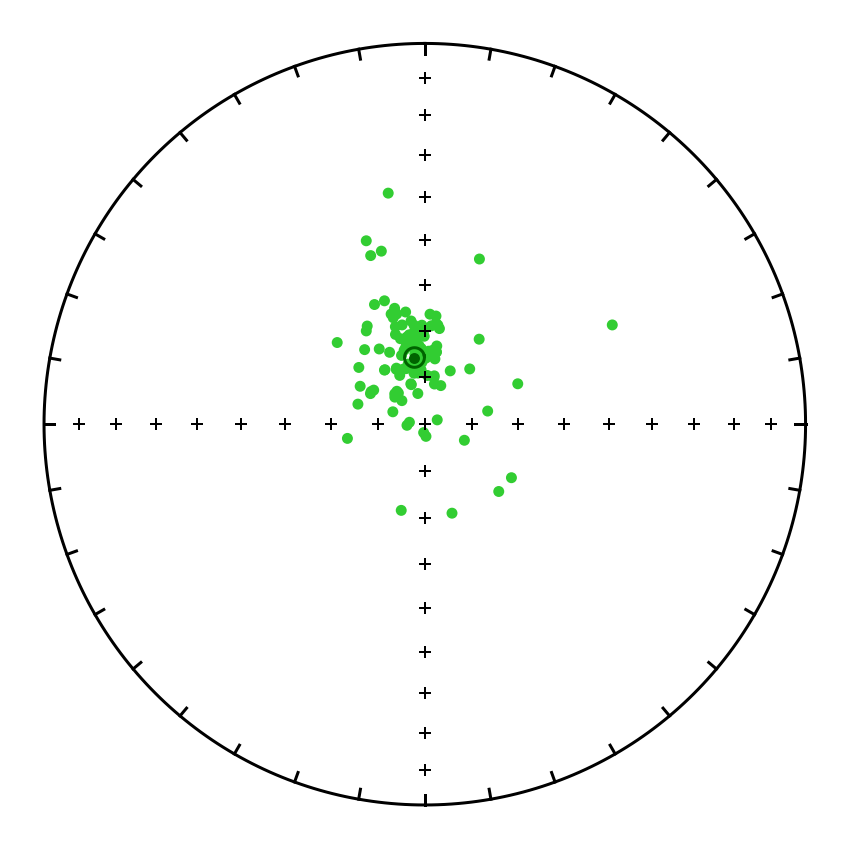

In [4]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_lt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_lt['dir_inc'].tolist(), color = 'limegreen')
ipmag.plot_di_mean(dec=Nonesuch_demag_site_lt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_lt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
                   color = 'darkgreen')

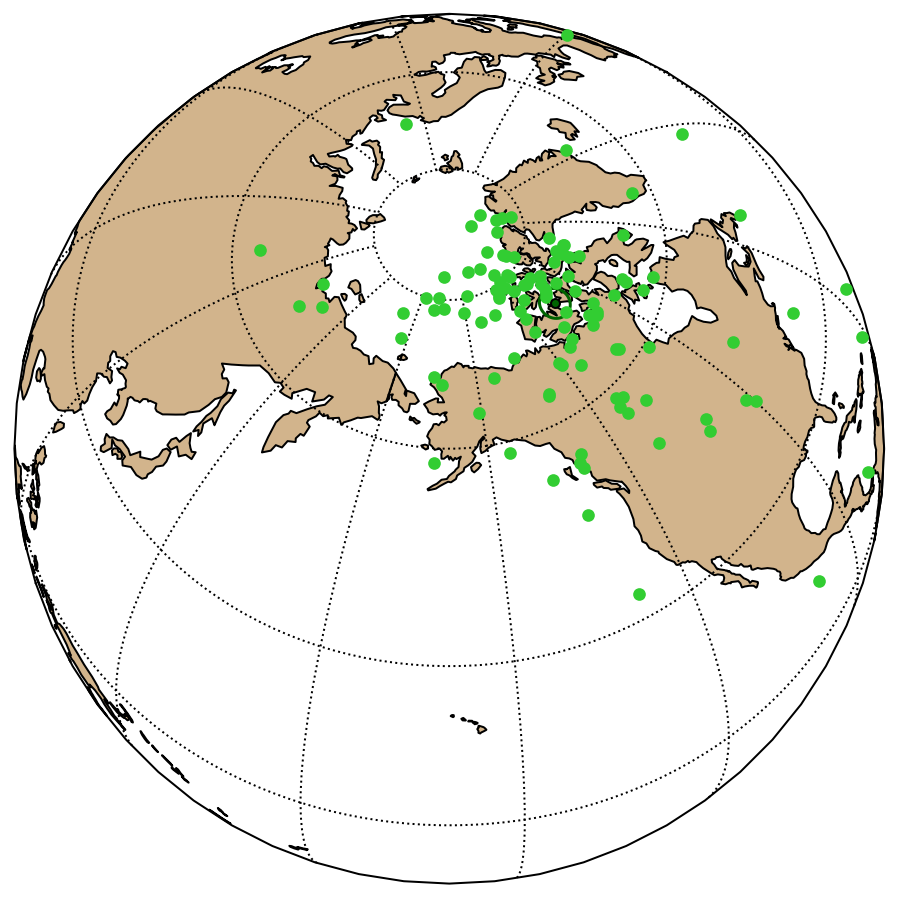

In [5]:
lt_axis = ipmag.make_orthographic_map(200, 60)
ipmag.plot_vgp(lt_axis, Nonesuch_demag_specimen_lt['vgp_lon'], Nonesuch_demag_specimen_lt['vgp_lat'], markersize = 40, color = 'limegreen', edge = 'none')
ipmag.plot_pole(lt_axis, plon=Nonesuch_demag_site_lt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_lt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
                   color = 'darkgreen')

### magnetite remanence

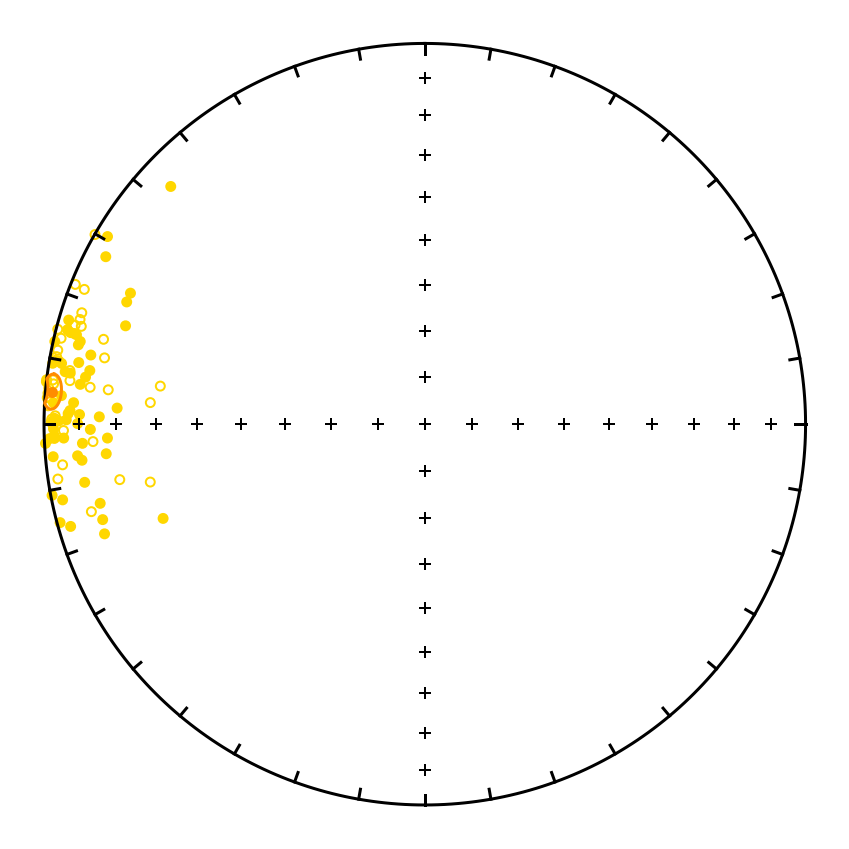

In [6]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mt['dir_inc'].tolist(), color = 'gold')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = 'darkorange')

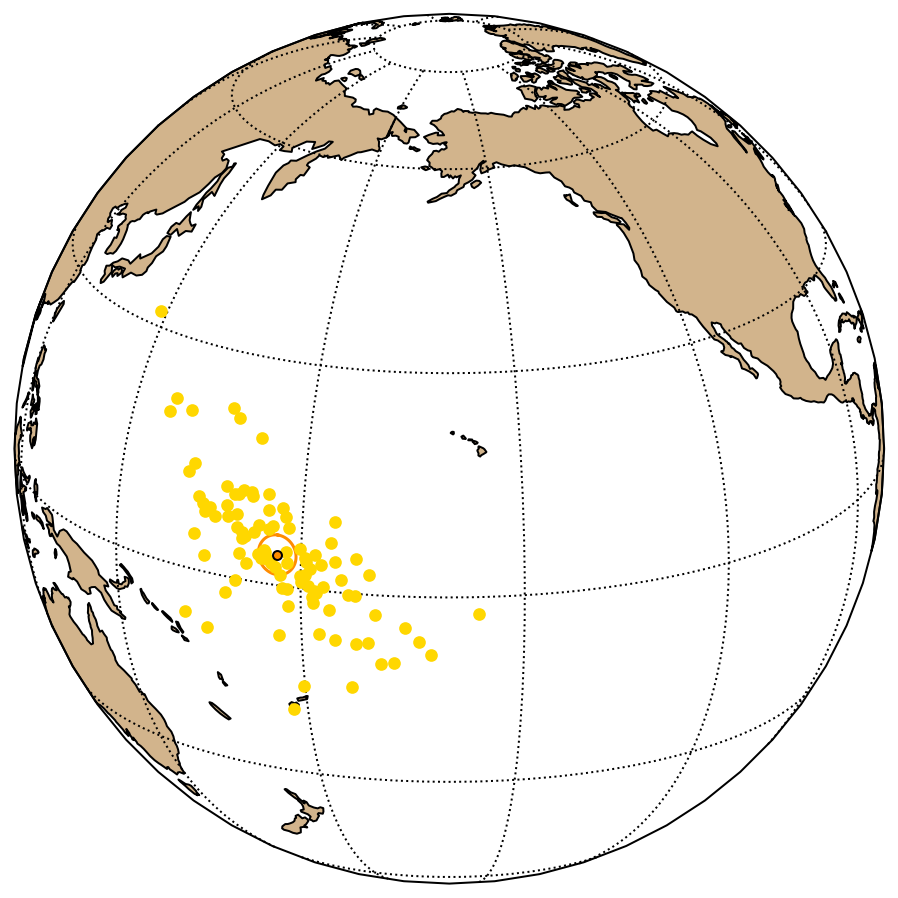

In [7]:
mt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(mt_axis, Nonesuch_demag_specimen_mt['vgp_lon'], Nonesuch_demag_specimen_mt['vgp_lat'], markersize = 40, color = 'gold', edge = 'none')
ipmag.plot_pole(mt_axis, plon=Nonesuch_demag_site_mt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_mt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = 'darkorange')

### hematite chemical remanence

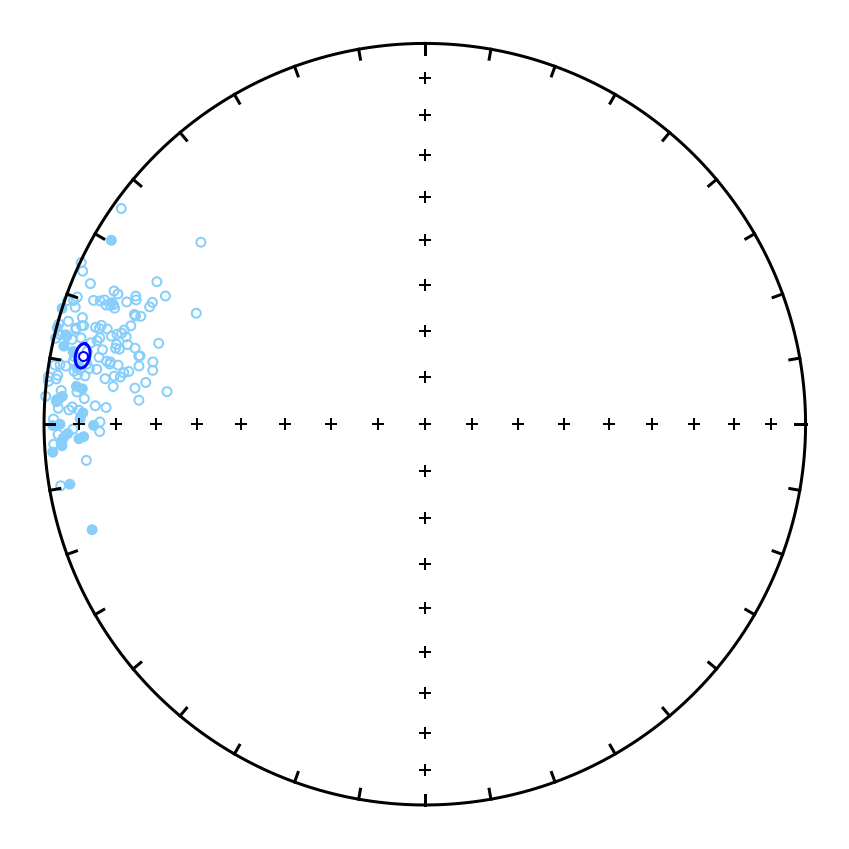

In [8]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hct['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hct['dir_inc'].tolist(), color = 'lightskyblue')
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = 'blue')

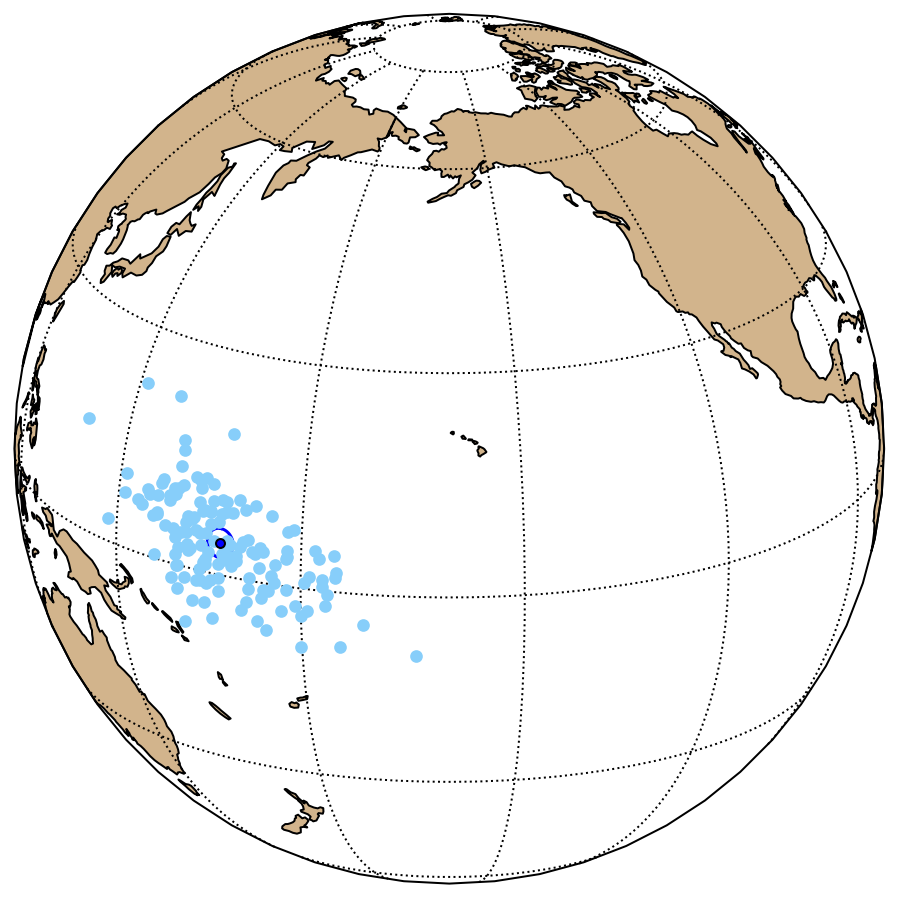

In [9]:
hct_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hct_axis, Nonesuch_demag_specimen_hct['vgp_lon'], Nonesuch_demag_specimen_hct['vgp_lat'], markersize = 40, color = 'lightskyblue', edge = 'none')
ipmag.plot_pole(hct_axis, plon=Nonesuch_demag_site_hct['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hct['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = 'blue')

In [10]:
Nonesuch_demag_site_hct['vgp_lon'].iloc[0], Nonesuch_demag_site_hct['vgp_lat'].iloc[0], Nonesuch_demag_site_hct['dir_alpha95'].iloc[0]

(168.1, 4.4, 2.0)

### hematite detrital remanence

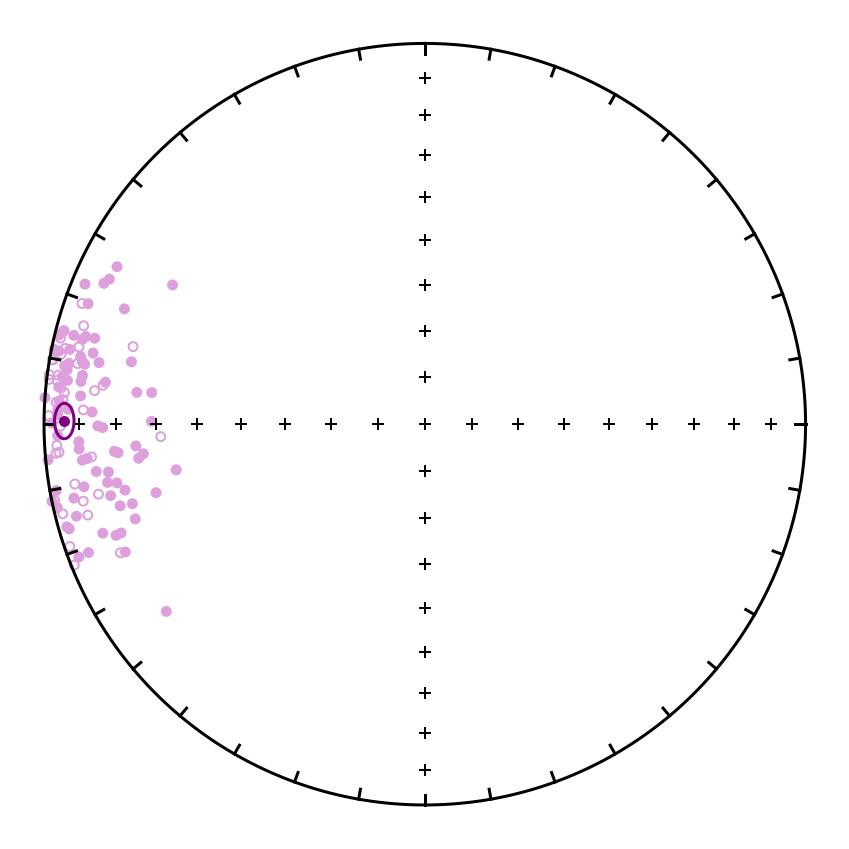

In [11]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), color = 'plum')
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = 'purple')

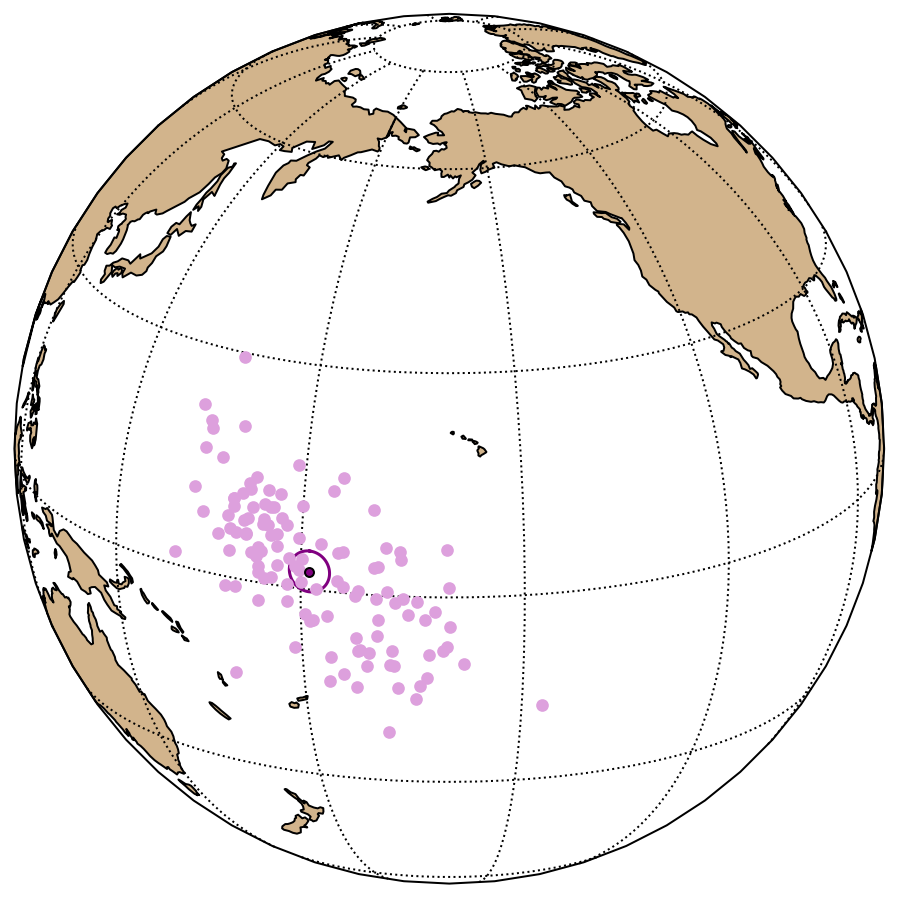

In [12]:
hdt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hdt_axis, Nonesuch_demag_specimen_hdt['vgp_lon'], Nonesuch_demag_specimen_hdt['vgp_lat'], markersize = 40, color = 'plum', edge = 'none')
ipmag.plot_pole(hdt_axis, plon=Nonesuch_demag_site_hdt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hdt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = 'purple')


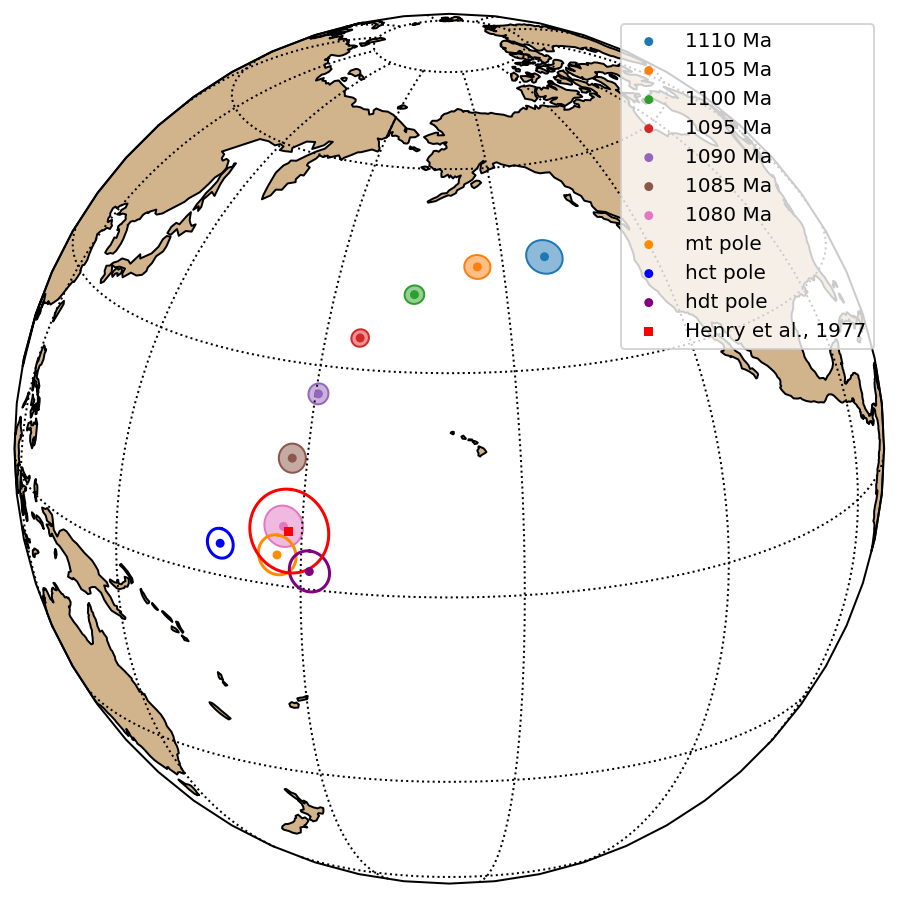

In [14]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

pole_axis = ipmag.make_orthographic_map(200, 20)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(pole_axis,fisher0['dec'],fisher0['inc'],theta0,label='1110 Ma', color = 'C0', edgecolor='none', 
                filled_pole=True, fill_color='C0', fill_alpha=0.5)

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(pole_axis,fisher1['dec'],fisher1['inc'],theta1,label='1105 Ma', color = 'C1', edgecolor='none',
                filled_pole=True, fill_color='C1', fill_alpha=0.5)

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(pole_axis,fisher2['dec'],fisher2['inc'],theta2,label='1100 Ma', color = 'C2', edgecolor='none',
                filled_pole=True, fill_color='C2', fill_alpha=0.5)

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(pole_axis,fisher3['dec'],fisher3['inc'],theta3,label='1095 Ma', color = 'C3', edgecolor='none',
                filled_pole=True, fill_color='C3', fill_alpha=0.5)

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(pole_axis,fisher4['dec'],fisher4['inc'],theta4,label='1090 Ma', color = 'C4', edgecolor='none',
                filled_pole=True, fill_color='C4', fill_alpha=0.5)

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(pole_axis,fisher5['dec'],fisher5['inc'],theta5,label='1085 Ma', color = 'C5', edgecolor='none',
                filled_pole=True, fill_color='C5', fill_alpha=0.5)

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(pole_axis,fisher6['dec'],fisher6['inc'],theta6,label='1080 Ma', color = 'C6', edgecolor='none',
                filled_pole=True, fill_color='C6', fill_alpha=0.5)

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_lt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_lt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
#                    color = 'darkgreen', edgecolor = 'none', label = 'lt pole')

ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_mt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_mt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = 'darkorange', edgecolor = 'none', label = 'mt pole')

ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_hct['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hct['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = 'blue', edgecolor = 'none', label = 'hct pole')

ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_hdt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hdt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = 'purple', edgecolor = 'none', label = 'hdt pole')

ipmag.plot_pole(pole_axis, 178.1, 7.6, 5.6, color = 'red', edgecolor = 'none', marker = 's', label = 'Henry et al., 1977')
plt.legend()
plt.show()